In [ ]:
# Based on TensorFlow quickstart course : https://www.tensorflow.org/tutorials/quickstart/beginner
# Modified by Mehdi Ammi, Univ. Paris 8

# TensorFlow quickstart 

To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select CONNECT.

2. To run all the code in the notebook, select Runtime > Run all. To run the code cells one at a time, hover over each cell and select the Run cell icon.

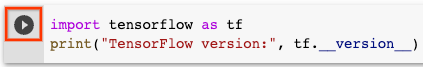

## Dataset

This tutorial uses the MINST dataset

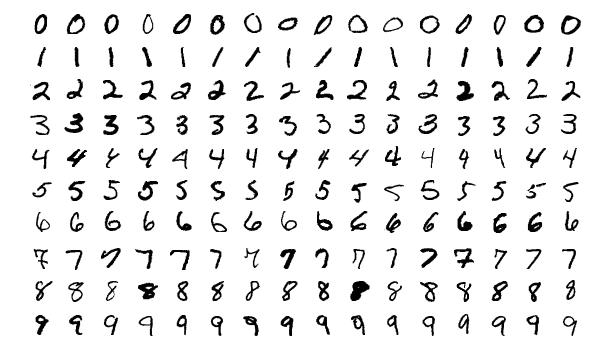

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

In [ ]:
TensorFlow version: 2.15.0

## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. 

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Plot the first 25 images from the training set

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

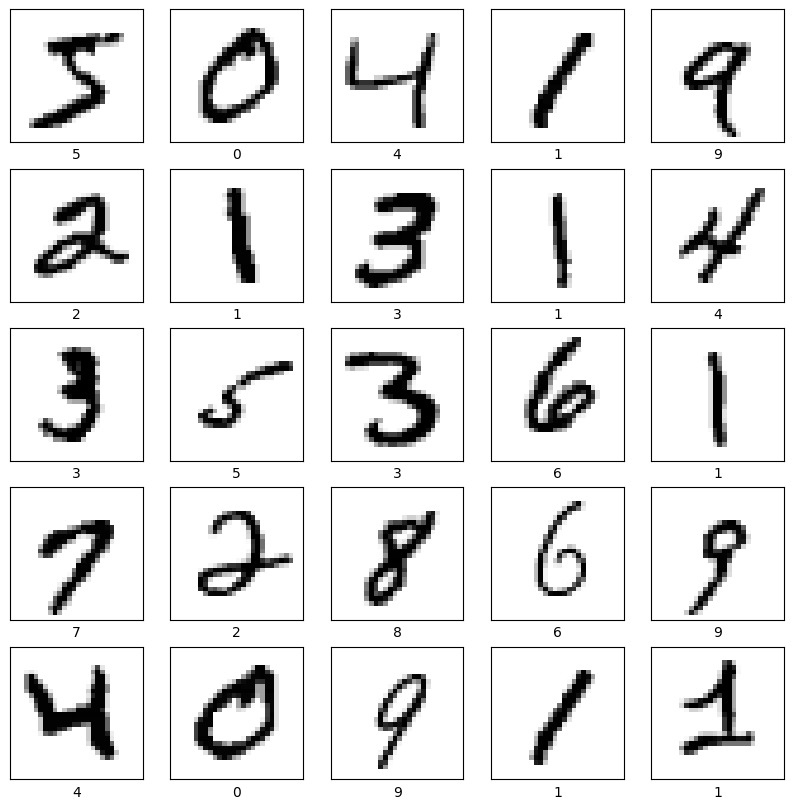

Scale these values to a range of 0 to 1 by dividing the values by 255.0. This also converts the sample data from integers to floating-point numbers:

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
11490434/11490434 [==============================] - 0s 0us/step

## Build a machine learning model

Build a tf.keras.Sequential model:

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

Sequential is useful for stacking layers where each layer has one input tensor and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the Flatten, Dense, and Dropout layers.

For each example, the model returns a vector of logits or log-odds scores, one for each class.

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

In [ ]:
array([[-0.00594383,  0.45658916,  0.10220155, -0.34953278,  0.46833006,
         0.074406  ,  0.2764801 ,  0.11277628, -0.29951403,  0.1871729 ]],
      dtype=float32)

The tf.nn.softmax function converts these logits to probabilities for each class:

In [ ]:
tf.nn.softmax(predictions).numpy()

In [ ]:
array([[0.08685794, 0.13793837, 0.09677796, 0.06160142, 0.13956742,
        0.09412502, 0.11520325, 0.0978068 , 0.06476101, 0.10536081]],
      dtype=float32)

Note: It is possible to bake the tf.nn.softmax function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using losses.SparseCategoricalCrossentropy:

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

In [ ]:
2.3631315

Before you start training, configure and compile the model using Keras Model.compile. Set the optimizer class to adam, set the loss to the loss_fn function you defined earlier, and specify a metric to be evaluated for the model by setting the metrics parameter to accuracy.

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the Model.fit method to adjust your model parameters and minimize the loss:

In [ ]:
model.fit(x_train, y_train, epochs=5)

In [ ]:
Epoch 1/5
WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1700101241.308881    9962 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2977 - accuracy: 0.9152
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1452 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1091 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0888 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0762 - accuracy: 0.9760
<keras.src.callbacks.History at 0x7efba0127d00>

The Model.evaluate method checks the model's performance, usually on a validation set or test set.

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
313/313 - 1s - loss: 0.0778 - accuracy: 0.9752 - 584ms/epoch - 2ms/step
[0.07776274532079697, 0.9751999974250793]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the TensorFlow tutorials.

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

In [ ]:
<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.6984657e-07, 3.8002440e-08, 1.6746913e-05, 1.0695006e-04,
        1.1966110e-10, 2.5961143e-07, 8.1565288e-13, 9.9987197e-01,
        1.0326594e-06, 2.8262818e-06],
       [1.3999164e-07, 5.5667624e-06, 9.9996352e-01, 2.4345095e-06,
        1.7454881e-17, 2.8163922e-05, 4.7398025e-08, 1.9670790e-15,
        1.7659848e-07, 2.6264062e-14],
       [3.0009883e-07, 9.9881589e-01, 2.4900693e-05, 1.1475331e-06,
        2.0097617e-05, 1.5349242e-05, 5.1976604e-05, 6.3451822e-04,
        4.3167319e-04, 4.1721478e-06],
       [9.9992681e-01, 2.3041305e-10, 3.7171503e-05, 1.1600308e-07,
        8.1849976e-09, 1.7707794e-06, 3.2530028e-05, 7.4367080e-07,
        1.2220231e-07, 7.3985012e-07],
       [2.4092253e-06, 2.3410928e-08, 4.2358351e-05, 1.2393063e-07,
        9.9869967e-01, 4.2786400e-05, 1.6083415e-05, 5.3349639e-05,
        1.4218396e-05, 1.1290688e-03]], dtype=float32)>

## Display prediction

Let's add some code at the end to display prediction results.

Import : 

1. matplotlib : plotting library  

2. numpy : library adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays

In [12]:
import matplotlib.pyplot as plt
import numpy as np

The function plot_image is used to visualize predictions made by a classification model. 

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)


Displaying the first 15 test images with their predictions

In [ ]:
probabilities = probability_model(x_test)
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 3, i+1)
    plot_image(i, probabilities.numpy(), y_test, x_test)
plt.tight_layout()
plt.show()

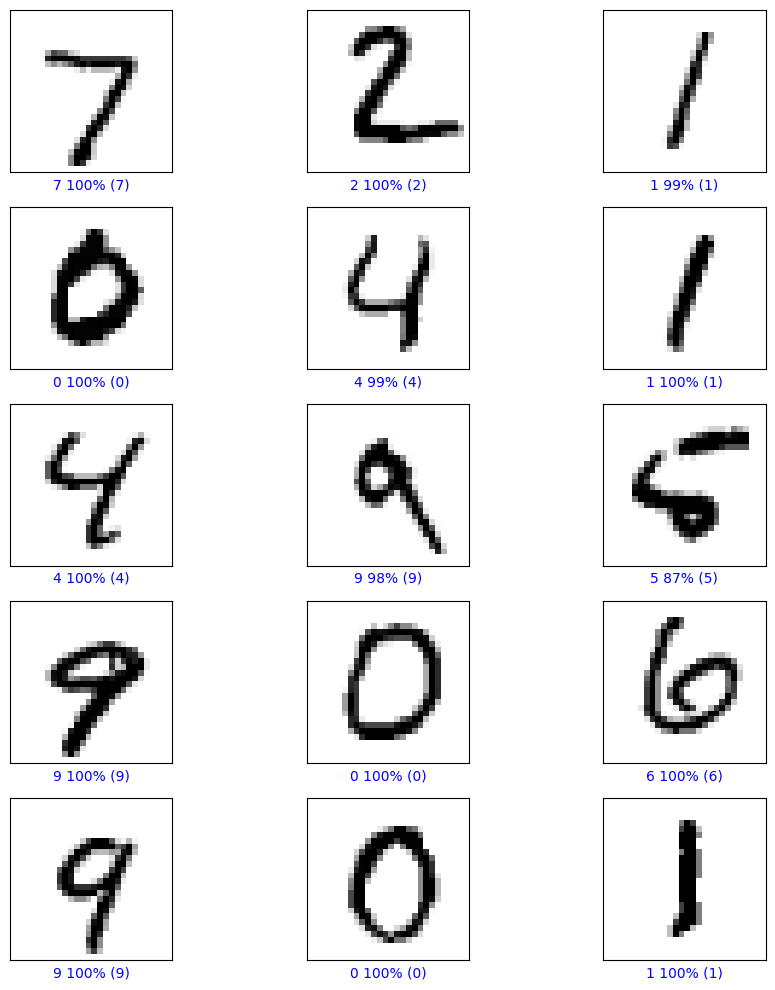

## Conclusion

You have trained a machine learning model using a prebuilt dataset using the Keras API.

# Exercises

Improve the provided MNIST digit classification model by experimenting with different neural network architectures and hyperparameters.

## Experiment with Convolutional Layers

Enhance the model by adding convolutional layers to improve image recognition capabilities.

Steps:

1. Modify the Model Architecture:

 - Add convolutional layers before the flatten layer.
 - Use layers such as Conv2D and MaxPooling2D.

2. Compile and Train the Model:

 - Compile the modified model.
 - Train it on the MNIST dataset.

3. Evaluate the Model:

- Compare the performance with the original model.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10)
])

## Hyperparameter Tuning 1

Optimize the model's performance by tuning hyperparameters.

Steps:

1. Experiment with Different Hyperparameters:

 - Try different learning rates, batch sizes, and numbers of epochs.
 - Use different numbers of neurons in dense layers.

2. Evaluate the Impact:

Evaluate how changes affect the model's performance.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=64)

## Hyperparameter Tuning 2

Compare the performance of different optimizers.

Steps:

1. Modify the Compilation Code:

 - Try different optimizers like SGD, RMSprop, and Adam.
 - Train and Evaluate the Model:

2. Compare the accuracy and loss for each optimizer.

In [ ]:
optimizers = ['sgd', 'rmsprop', 'adam']
for opt in optimizers:
    model.compile(optimizer=opt,
                  loss=loss_fn,
                  metrics=['accuracy'])
    print(f"Training with {opt} optimizer")
    model.fit(x_train, y_train, epochs=5)
    model.evaluate(x_test, y_test, verbose=2)

## Grid Search for Hyperparameters

Find the optimal hyperparameters for the model.

Steps:

1. Grid Search for Hyperparameters:

 - Try different values for learning rates, batch sizes, and number of epochs.

2. Evaluate the Model:

- Determine the best combination of hyperparameters.

In [ ]:
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
epochs = [5, 10]

for lr in learning_rates:
    for bs in batch_sizes:
        for ep in epochs:
            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                          loss=loss_fn,
                          metrics=['accuracy'])
            print(f"Training with lr={lr}, batch_size={bs}, epochs={ep}")
            model.fit(x_train, y_train, batch_size=bs, epochs=ep)
            model.evaluate(x_test, y_test, verbose=2)

## Data Augmentation

Improve model generalization by augmenting the training data.

Steps:

1. Apply Data Augmentation:

- Use ImageDataGenerator to augment the training images.
- Apply transformations like rotation, zoom, and horizontal flip.

2. Train the Model with Augmented Data:

- Train the model using the augmented data.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(x_train.reshape(-1, 28, 28, 1))

model.fit(datagen.flow(x_train.reshape(-1, 28, 28, 1), y_train, batch_size=32), epochs=5)

## Model Regularization

Prevent overfitting using regularization techniques.

Steps:

1. Add Regularization:

 - Use L2 regularization in dense layers.
 - Implement dropout layers with different rates.

2; Compare Performance:

 - Evaluate the model's performance with and without regularization.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10)
])

## Implement Early Stopping

Prevent overfitting and reduce training time by implementing early stopping.

Steps:

1. Add Early Stopping:

 - Use the EarlyStopping callback to monitor validation loss.

2. Train the Model:

 - Train the model with early stopping.

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])

## New Dataset

Adapt the  code to work with the CIFAR-10 dataset. 
The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.


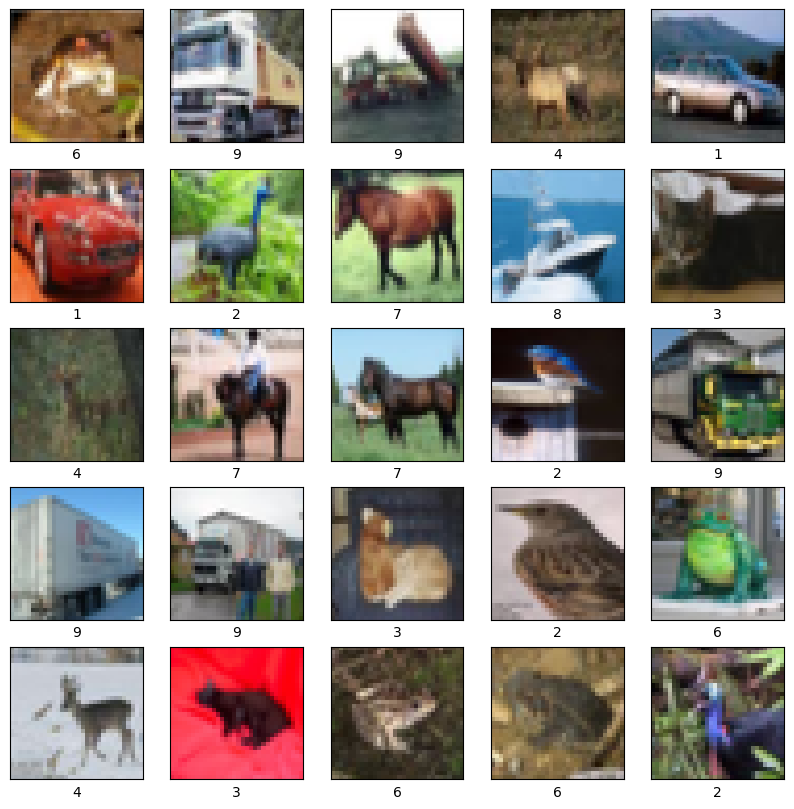

Key differences in the code :

1. Dataset Loading:

 - 'mnist' is replaced with 'cifar10' to load the CIFAR-10 dataset.
 - CIFAR-10 images are 32x32x3 (color images), unlike MNIST's 28x28 grayscale images.

2. Data Visualization:

 - Display the CIFAR-10 images in color without the grayscale colormap.

3. Input Shape:

 - The input shape for the Flatten layer is changed from (28, 28) to (32, 32, 3) to accommodate CIFAR-10 images.

4. Normalization:

 - CIFAR-10 data is also normalized to values between 0 and 1 by dividing by 255.

5. Loss and Evaluation:

 - The same loss function and evaluation methods are used as they are general to classification problems.

# Deliverables

Submit the modified code for each exercise.

Provide a brief report on the impact of each modification on model performance. Include accuracy, loss, and any other relevant metrics.